In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
import geopandas as gpd
from shapely.geometry import Point

In [3]:
import geocoder
import requests
import time

In [4]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

You can find many different shapefiles for Chicago on Chicago's data portal. I downloaded (via "export") the 2010 census tract regions from [this page](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik).

In [5]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - Census Tracts - 2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

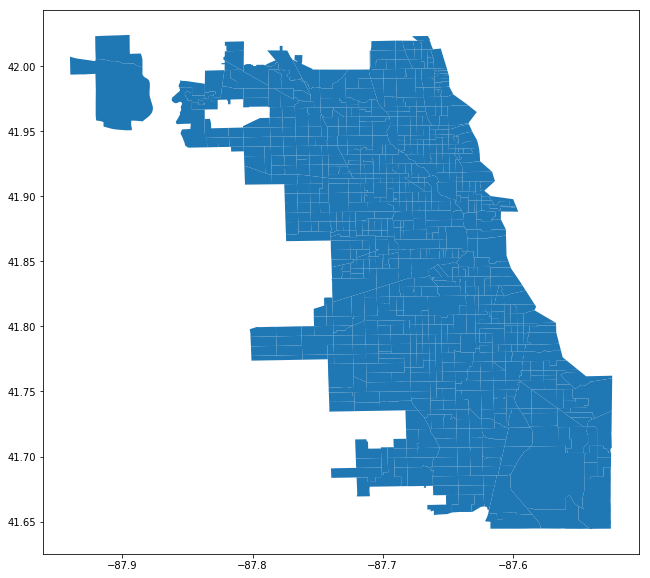

In [6]:
chicago_census_tracts.plot(figsize=(15,10))

In [7]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."


Let's look at just one of these census tracts, just to explore the operations we can do with Geopandas and Shapely.

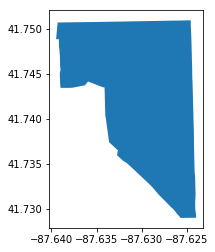

In [8]:
tmp = chicago_census_tracts[chicago_census_tracts['name10'] == '8424']
tmp.plot()

In the plot above, the x axis shows longitude values and the y axis shows latitude values. I'll make two points, one inside the above region, and one outside that region.

In [9]:
tmp_pt1 = Point(-87.63, 41.74)
tmp_pt2 = Point(-87.63, 41.73)

In [10]:
# Point 1 is in the region, so this should return True
tmp.contains(tmp_pt1)

0    True
dtype: bool

In [11]:
# Point 2 is outside the region, so this should return False
tmp.contains(tmp_pt2)

0    False
dtype: bool

In [12]:
CSV_PATH = os.path.join('data', 'hacknight_ticket_sample_data_2015.csv')
df = pd.read_csv(CSV_PATH,low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [13]:
CSV_PATH = os.path.join('data', 'hacknight_sample_data_geocode.csv')
addrs_df = pd.read_csv(CSV_PATH)
addrs_df['address'] = addrs_df['address'] + ', chicago, il'

In [14]:
geocoded_df = pd.merge(left=df, right=addrs_df, how='inner', on='address')
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986
1,9188417037,2015-01-01 21:29:00,2167 S ARCHER AV,ac7f6f4be49dfa223571838e586653aa5cdcb6bdfc6385...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MITS,50,100,0.0,50.0,Paid,2015-01-05,NaN,NaN,0,1529,"2100 s archer av, chicago, il",41.854262,-87.631986
2,9188598734,2015-03-26 13:14:00,2140 S ARCHER AV,a493850f62c8ca5a25787271859f0409c289fb84130f33...,OH,PAS,45409,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,PORS,60,120,146.4,0.0,Notice,2015-04-08,SEIZ,NaN,5191566530,780,"2100 s archer av, chicago, il",41.854262,-87.631986
3,9189154639,2015-07-24 14:18:00,2172 S ARCHER AV,38a1ef0c0a325c79e9dba69f6e96652fcbf1e9dcb5db3f...,IL,PAS,606161514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MERZ,50,100,0.0,0.0,Dismissed,2015-09-14,VIOL,Not Liable,5176435360,796,"2100 s archer av, chicago, il",41.854262,-87.631986
4,9188041623,2015-01-17 14:45:00,2107 S ARCHER AV,e3c39cce6c30735cc977656a463233ea6f516328828e8d...,LA,PAS,70072,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HOND,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5181845840,1461,"2100 s archer av, chicago, il",41.854262,-87.631986


I need to make Point objects from the latitude and longitude values.

In [15]:
point_maker = lambda x: Point(x['lng'], x['lat'])

In [16]:
geocoded_df.iloc[90:110].apply(point_maker, axis=1)

90     POINT (-87.63198586874586 41.85426174412816)
91     POINT (-87.63198586874586 41.85426174412816)
92     POINT (-87.63198586874586 41.85426174412816)
93     POINT (-87.63198586874586 41.85426174412816)
94     POINT (-87.63198586874586 41.85426174412816)
95     POINT (-87.63198586874586 41.85426174412816)
96     POINT (-87.63198586874586 41.85426174412816)
97     POINT (-87.63198586874586 41.85426174412816)
98          POINT (-87.7554106162966 41.8879183222)
99          POINT (-87.7554106162966 41.8879183222)
100         POINT (-87.7554106162966 41.8879183222)
101         POINT (-87.7554106162966 41.8879183222)
102         POINT (-87.7554106162966 41.8879183222)
103         POINT (-87.7554106162966 41.8879183222)
104    POINT (-87.66162070827761 41.94533245133371)
105    POINT (-87.66162070827761 41.94533245133371)
106    POINT (-87.66162070827761 41.94533245133371)
107    POINT (-87.66162070827761 41.94533245133371)
108    POINT (-87.66162070827761 41.94533245133371)
109    POINT

In [17]:
geocoded_df['geometry'] = geocoded_df.apply(point_maker, axis=1)

In [18]:
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816)
1,9188417037,2015-01-01 21:29:00,2167 S ARCHER AV,ac7f6f4be49dfa223571838e586653aa5cdcb6bdfc6385...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MITS,50,100,0.0,50.0,Paid,2015-01-05,NaN,NaN,0,1529,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816)
2,9188598734,2015-03-26 13:14:00,2140 S ARCHER AV,a493850f62c8ca5a25787271859f0409c289fb84130f33...,OH,PAS,45409,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,PORS,60,120,146.4,0.0,Notice,2015-04-08,SEIZ,NaN,5191566530,780,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816)
3,9189154639,2015-07-24 14:18:00,2172 S ARCHER AV,38a1ef0c0a325c79e9dba69f6e96652fcbf1e9dcb5db3f...,IL,PAS,606161514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MERZ,50,100,0.0,0.0,Dismissed,2015-09-14,VIOL,Not Liable,5176435360,796,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816)
4,9188041623,2015-01-17 14:45:00,2107 S ARCHER AV,e3c39cce6c30735cc977656a463233ea6f516328828e8d...,LA,PAS,70072,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HOND,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5181845840,1461,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816)


In [19]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."


In [20]:
def assign_census_tracts(df, shape_df, locid_var='census_tract_id'):
    """Joins DataFrame with region shapefile.
    This function takes a DataFrame containing latitude and longitude values and
    a GeopandasDataFrame that describes regions that those lat-long pairs are sorted
    into. This should facilitate pairing with Census data that can introduce other
    features like racial demographics.
    Parameters
    ----------
    df : pandas.DataFrame or dask.DataFrame
        DataFrame containing latitudes, longitudes, and location_id columns.
    shape_df:    a GeopandasDataFrame containing regions to map to.
    locid_var : string
        Name of series to return. 
    """

    # make a copy since we will modify lats and lons
#     localdf = df[['lng', 'lat']].copy()
    localdf = df.copy()
    
    # missing lat lon info is indicated by nan. Fill with zero
    # which is outside New York shapefile. 
    localdf['lng'] = localdf['lng'].fillna(value=0.)
    localdf['lat'] = localdf['lat'].fillna(value=0.)
    
    shape_df = shape_df.to_crs({'init': 'epsg:4326'})

    try:
        local_gdf = gpd.GeoDataFrame(
            localdf, crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in zip(localdf['lng'], localdf['lat'])]
        )

        local_gdf = gpd.sjoin(local_gdf, shape_df, how='left', op='within')

        return local_gdf
    except ValueError as ve:
        print(ve)
        print(ve.stacktrace())
        series = localdf['lng']
        series = np.nan
        return series

In [21]:
full_df = assign_census_tracts(geocoded_df, chicago_census_tracts)

In [22]:
full_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
1,9188417037,2015-01-01 21:29:00,2167 S ARCHER AV,ac7f6f4be49dfa223571838e586653aa5cdcb6bdfc6385...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MITS,50,100,0.0,50.0,Paid,2015-01-05,NaN,NaN,0,1529,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
2,9188598734,2015-03-26 13:14:00,2140 S ARCHER AV,a493850f62c8ca5a25787271859f0409c289fb84130f33...,OH,PAS,45409,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,PORS,60,120,146.4,0.0,Notice,2015-04-08,SEIZ,NaN,5191566530,780,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
3,9189154639,2015-07-24 14:18:00,2172 S ARCHER AV,38a1ef0c0a325c79e9dba69f6e96652fcbf1e9dcb5db3f...,IL,PAS,606161514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MERZ,50,100,0.0,0.0,Dismissed,2015-09-14,VIOL,Not Liable,5176435360,796,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
4,9188041623,2015-01-17 14:45:00,2107 S ARCHER AV,e3c39cce6c30735cc977656a463233ea6f516328828e8d...,LA,PAS,70072,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HOND,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5181845840,1461,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None


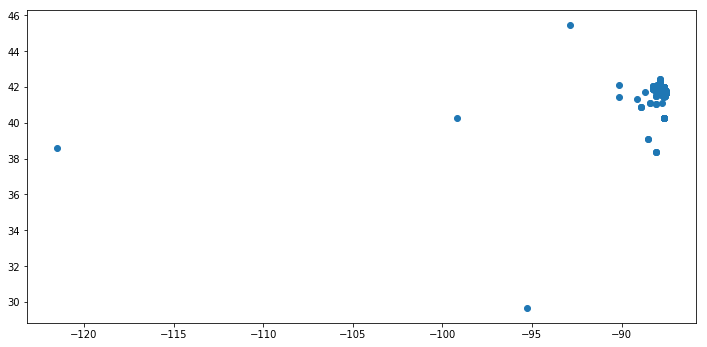

In [23]:
full_df.plot(figsize=(12,6))

Looking at this plot of latitude and longitude values, there are clearly some outlier values. Let's see what the proper boundaries are for Chicago, then let's look at these outliers.

In [24]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - City.zip')
coord_system = {'init': 'epsg:4326'}
chicago_boundary = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

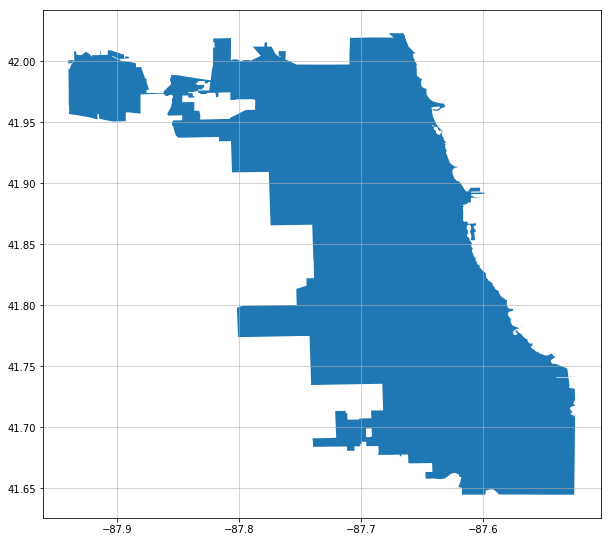

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
chicago_boundary.plot(ax=ax)
ax.grid(True, alpha=0.7)

Looking at this plot, we see that all of the points in Chicago will be between longitude values [-88.0 and -87.5], and the latitude values will be between [41.63 and 42.05]. 

In [41]:
outside_points = full_df[(full_df['lat'] <= 41.63) | (full_df['lat'] >= 42.05) | 
                         (full_df['lng'] <= -88.0) | (full_df['lng'] >= -87.5)]

In [78]:
outside_points.shape

(87, 36)

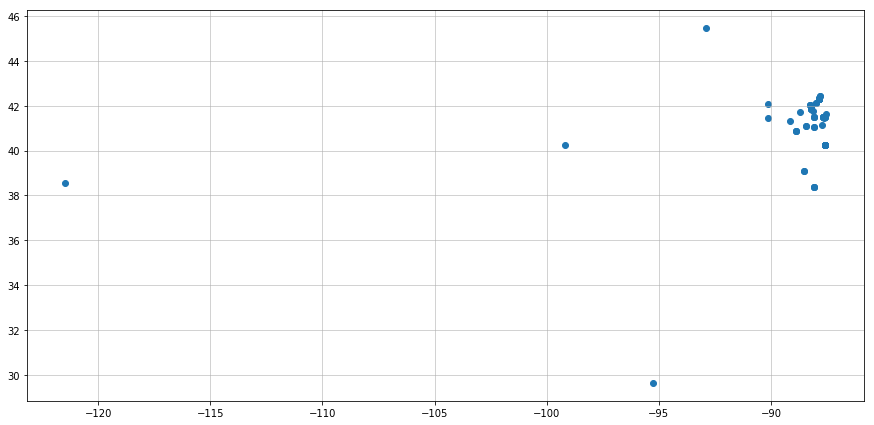

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
outside_points.plot(ax=ax)
ax.grid(True, alpha=0.7)

Let's look at that extremely distant point first.

In [48]:
full_df.loc[(full_df['lng'] < -110)]

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
49340,9189730654,2015-12-02 10:06:00,1700 N SACRAMENTO,df95047db5ead4b1f7104c5e65a47ff7548862682283f5...,IL,PAS,60625,0964100A,WITHIN 15' OF FIRE HYDRANT,498,DOF,FORD,150,300,0.0,150.0,Paid,2016-01-11,VIOL,NaN,5191746240,753,"1700 n sacramento, chicago, il",38.573236,-121.485619,POINT (-121.4856192778291 38.57323611183575),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hmm, the address for that far left point is 1700 N. Sacramento. Perhaps the geocoder mistakenly thought this address was in Sacramento, CA. Let's check.

In [49]:
class GeoSessions:
    def __init__(self):
        self.Arcgis = requests.Session()
        self.Komoot = requests.Session()
        self.USCensus = requests.Session()
        self.OSM = requests.Session()

def create_sessions():
    return GeoSessions()

def geocode_address(address, s):
    g = geocoder.arcgis(address, session=s.Arcgis)
    if (g.ok == False):
        g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.osm(address, session=s.OSM)
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    return g

s = create_sessions()

In [50]:
addr = full_df.loc[(full_df['lng'] < -110), 'address']
tmp = geocode_address(addr, s)
print(addr)
print('Latitude:  {}'.format(tmp.lat))
print('Longitude: {}'.format(tmp.lng))

49340    1700 n sacramento, chicago, il
Name: address, dtype: object
Latitude:  38.57321607908717
Longitude: -121.48559899362336


Ok, so we can confirm that this error occurs when the ArcGIS geocoder geocodes the address. Let's rearange things a bit. 

In [51]:
def geocode_address(address, s):
    g = geocoder.osm(address, session=s.OSM)
    if (g.ok == False):
        g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    return g

s = create_sessions()

In [52]:
addr = full_df.loc[(full_df['lng'] < -110), 'address']
tmp = geocode_address(addr, s)
print(addr)
print('Latitude:  {}'.format(tmp.lat))
print('Longitude: {}'.format(tmp.lng))

49340    1700 n sacramento, chicago, il
Name: address, dtype: object
Latitude:  41.88964985
Longitude: -87.7008938485065


Ah, using the OSM geocoder produced much more reasonable latitude and longitude values. Let's eliminate the ArcGIS geocoder from my geocode_address function.

In [53]:
def geocode_address(address, s):
    g = geocoder.osm(address, session=s.OSM)
    if (g.ok == False):
        g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    return g

s = create_sessions()

In [54]:
for ind in outside_points.index:
    tmp = geocode_address(geocoded_df.loc[ind, 'address'], s)
    geocoded_df.loc[ind, 'lat'] = tmp.lat
    geocoded_df.loc[ind, 'lng'] = tmp.lng

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=900+w+sangamon%2C+chicago%2C+il&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000028642FE5320>: Failed to establish a new connection: [WinError 10051] A socket operation was attempted to an unreachable network',))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1+e+113t+pl%2C+chicago%2C+il&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000028642FEF358>: Failed to establish a new connection: [WinError 10051] A socket operation was attempted to an unreachable network',))
Status code Unknown from https://nominatim.

In [67]:
full_df.loc[outside_points.index, 'lat'] = geocoded_df.loc[outside_points.index, 'lat']
full_df.loc[outside_points.index, 'lng'] = geocoded_df.loc[outside_points.index, 'lng']

In [68]:
full_df.loc[outside_points.index, 'geometry'] = full_df.iloc[outside_points.index].apply(point_maker, axis=1)

In [69]:
outside_points2 = full_df[(full_df['lat'] <= 41.63) | (full_df['lat'] >= 42.05) | 
                          (full_df['lng'] <= -88.0) | (full_df['lng'] >= -87.5)]

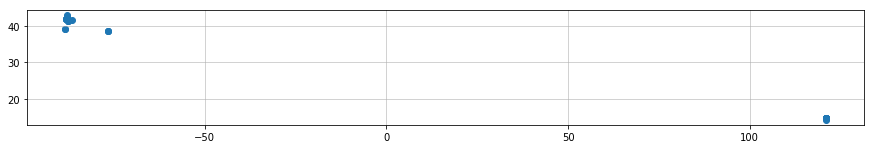

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
outside_points2.plot(ax=ax)
ax.grid(True, alpha=0.7)

Alright, that's better, but it looks like this lead to some wildly incorrect longitude values in the other direction. Let's examine.

In [72]:
outside_points2.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
1371,65532593,2015-08-14 07:45:00,3 W TERMINAL 3J,d9865f05c10e3f24ef947be7c0346e31cff554a1cdd7c6...,IL,TXI,NaN,0964150B,PARKING/STANDING PROHIBITED ANYTIME,50,CPD-Airport,TOYT,75,150,0.0,75.0,Paid,2015-08-28,NaN,NaN,0,5282,"3 w terminal 3j, chicago, il",14.590778,120.966310,POINT (120.9663103 14.5907783),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,9189764378,2015-12-18 14:05:00,2701 S PRAIRIE,ab214bfcae47665941b3cdc6270e6c6b038f1d227536ae...,IL,PAS,629012249,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,HOND,60,120,146.4,0.0,Notice,2015-12-24,SEIZ,NaN,5170191190,804,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,9188713891,2015-04-21 08:58:00,2766 S PRAIRIE,ad692c84ea211c7261155c7811a474d26402ebb6fc6ebc...,IL,PAS,606162845,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,HOND,200,400,0.0,200.0,Paid,2015-05-11,VIOL,NaN,5183286700,119,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,66365360,2015-09-23 09:20:00,2711 S PRAIRIE,0cc1a6c217751816cdfd508259abc8a2c5af5e4c9510c5...,IL,PAS,60616,0964040B,STREET CLEANING,1,CPD,CADI,60,120,0.0,60.0,Paid,2015-10-22,VIOL,NaN,5194298820,10246,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,9188385995,2015-01-22 07:58:00,2736 S PRAIRIE,2c2ad812f638b0ead87b019f1a8039f5e2f85585388419...,IL,PAS,606202111,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,CHEV,75,150,0.0,75.0,Paid,2015-03-26,DETR,NaN,5176360180,125,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
outside_points2.shape

(31, 36)

Ok, that fixed 56 of the observations outside of Chicago's bounding box, but let's also look for points within that bounding box, but also outside of Chicago's boundary.

In [73]:
chicago_poly = chicago_boundary.geometry.unary_union

In [74]:
outside_chicago = full_df[~full_df.geometry.within(chicago_poly)]

In [75]:
outside_chicago.shape

(103, 36)

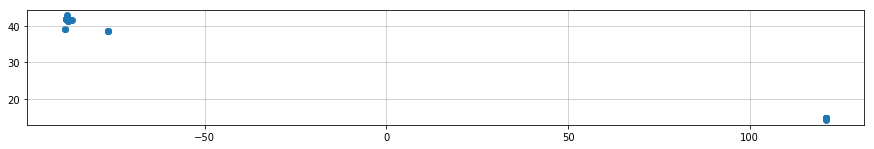

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
outside_chicago.plot(ax=ax)
ax.grid(True, alpha=0.7)

In [80]:
def geocode_address(address, s):
    g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.osm(address, session=s.OSM)        
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    return g

s = create_sessions()

In [81]:
for ind in outside_chicago.index:
    tmp = geocode_address(full_df.loc[ind, 'address'], s)
    full_df.loc[ind, 'lat'] = tmp.lat
    full_df.loc[ind, 'lng'] = tmp.lng

In [82]:
full_df.loc[outside_chicago.index, 'geometry'] = full_df.iloc[outside_chicago.index].apply(point_maker, axis=1)

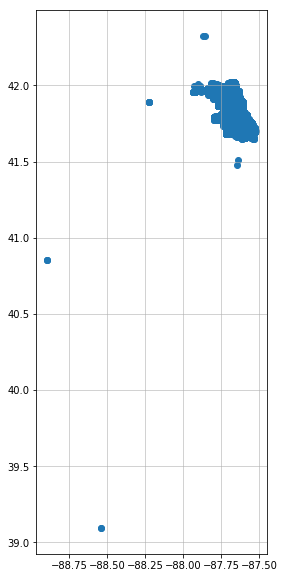

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
full_df.plot(ax=ax)
ax.grid(True, alpha=0.7)

That's a lot better, but there are still some points that are clearly not near Chicago. Let's subset them out again.

In [86]:
# This is another method for selecting observations located outside of Chicago
#   but it was slower, so I probably won't use it again.
outside_chicago_2 = full_df[full_df.geometry.disjoint(chicago_poly)]

In [87]:
outside_chicago_2.shape

(17, 36)

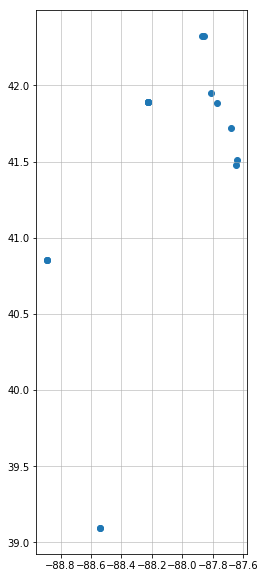

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
outside_chicago_2.plot(ax=ax)
ax.grid(True, alpha=0.7)

In [89]:
outside_chicago_2

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
6311,9189764378,2015-12-18 14:05:00,2701 S PRAIRIE,ab214bfcae47665941b3cdc6270e6c6b038f1d227536ae...,IL,PAS,629012249,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,HOND,60,120,146.4,0.0,Notice,2015-12-24,SEIZ,NaN,5170191190,804,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,9188713891,2015-04-21 08:58:00,2766 S PRAIRIE,ad692c84ea211c7261155c7811a474d26402ebb6fc6ebc...,IL,PAS,606162845,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,HOND,200,400,0.0,200.0,Paid,2015-05-11,VIOL,NaN,5183286700,119,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,66365360,2015-09-23 09:20:00,2711 S PRAIRIE,0cc1a6c217751816cdfd508259abc8a2c5af5e4c9510c5...,IL,PAS,60616,0964040B,STREET CLEANING,1,CPD,CADI,60,120,0.0,60.0,Paid,2015-10-22,VIOL,NaN,5194298820,10246,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,9188385995,2015-01-22 07:58:00,2736 S PRAIRIE,2c2ad812f638b0ead87b019f1a8039f5e2f85585388419...,IL,PAS,606202111,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,CHEV,75,150,0.0,75.0,Paid,2015-03-26,DETR,NaN,5176360180,125,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6315,65701164,2015-04-24 12:00:00,2700 S PRAIRIE,93f9cd9f3d4688e44fc64833fd146f3a96ba1c69cb563c...,IL,PAS,604523173,0976160A,REAR AND FRONT PLATE REQUIRED,1,CPD,MITS,60,120,0.0,0.0,Dismissed,2015-09-25,VIOL,Not Liable,5127499350,19920,"2700 s prairie, chicago, il",41.890250,-88.223094,POINT (-88.22309444770821 41.8902501),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18298,66233592,2015-07-22 07:13:00,119 N AUSTIN BLVD,044841b40229741c09186a9b5facdeb42d458b70629ef9...,IL,PAS,604023079,0964080A,RUSH HOUR PARKING,15,CPD,DODG,100,200,244.0,0.0,Notice,2017-09-11,SEIZ,NaN,5175016710,16637,"100 n austin blvd, chicago, il",41.882773,-87.774852,POINT (-87.774852 41.882773),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23795,66087881,2015-08-12 21:55:00,7525 W IRVING PRK RD,05d7725f6185542de19ba9dd92d31f80ff6ec182d85885...,IL,TMP,60634,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",16,CPD,MERZ,75,150,0.0,0.0,Dismissed,2015-09-29,NaN,Not Liable,5194393960,12292,"7500 w irving prk rd, chicago, il",41.952600,-87.814735,POINT (-87.814735 41.9526),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27453,65670305,2015-02-22 11:15:00,8208 S CAMPBELL,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,PAS,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,8,CPD,VOLV,60,120,60.0,0.0,Define,2015-02-26,NaN,NaN,0,16422,"8200 s campbell, chicago, il",41.477860,-87.649906,POINT (-87.64990589999999 41.47786),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27504,66540921,2015-12-05 09:30:00,1615 N WOOD,5a1abeb63a8003f5621e4374082dd897870a5170833d06...,IL,PAS,606224961,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,ACUR,60,120,0.0,60.0,Paid,2016-01-11,VIOL,NaN,5190151810,16934,"1600 n wood, chicago, il",40.855767,-88.891794,POINT (-88.8917938 40.8557665),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27505,65763537,2015-02-20 12:55:00,1668 N WOOD,66e8b2c6c99f7d7f7dfda937bb7eba029fd37d5bb77438...,IL,PAS,606221326,0964100A,WITHIN 15' OF FIRE HYDRANT,14,CPD,CHEV,150,300,0.0,150.0,Paid,2015-03-15,VIOL,NaN,5190611460,16565,"1600 n wood, chicago, il",40.855767,-88.891794,POINT (-88.8917938 40.8557665),NaN,NaN,NaN,NaN,NaN,NaN,N

In [92]:
class GeoSessions:
    def __init__(self):
        self.Arcgis = requests.Session()
        self.Komoot = requests.Session()
        self.USCensus = requests.Session()
        self.OSM = requests.Session()
        self.geolytica = requests.Session()

def geocode_address(address, s):
    g = geocoder.geolytica(address, session=s.geolytica) 
    if (g.ok == False):
        g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.osm(address, session=s.OSM)        
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    return g

s = create_sessions()

In [93]:
for ind in outside_chicago_2.index:
    tmp = geocode_address(full_df.loc[ind, 'address'], s)
    full_df.loc[ind, 'lat'] = tmp.lat
    full_df.loc[ind, 'lng'] = tmp.lng

Status code Unknown from http://geocoder.ca: ERROR - HTTPConnectionPool(host='geocoder.ca', port=80): Max retries exceeded with url: /?json=1&locate=8200+s+campbell%2C+chicago%2C+il&geoit=xml (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000028643071550>, 'Connection to geocoder.ca timed out. (connect timeout=5.0)'))
Status code Unknown from http://geocoder.ca: ERROR - HTTPConnectionPool(host='geocoder.ca', port=80): Read timed out. (read timeout=5.0)


In [94]:
full_df.loc[outside_chicago.index, 'geometry'] = full_df.iloc[outside_chicago.index].apply(point_maker, axis=1)

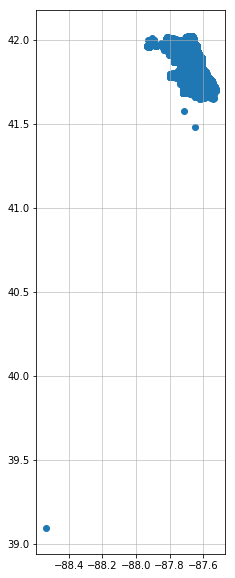

In [95]:
fig, ax = plt.subplots(figsize=(15,10))
full_df.plot(ax=ax)
ax.grid(True, alpha=0.7)

That looks pretty great. Let's see how many fall outside of Chicago now.

In [96]:
outside_chicago_3 = full_df[~full_df.geometry.within(chicago_poly)]

In [97]:
outside_chicago_3.shape

(4, 36)

Not bad. Only 4 data points are outside of Chicago now. Let's check them out.

In [98]:
outside_chicago_3

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
27453,65670305,2015-02-22 11:15:00,8208 S CAMPBELL,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,PAS,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,8,CPD,VOLV,60,120,60.0,0.0,Define,2015-02-26,NaN,NaN,0,16422,"8200 s campbell, chicago, il",41.477860,-87.649906,POINT (-87.64990589999999 41.47786),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31499,65836280,2015-06-16 18:55:00,9501 S WESTERN,588ebcdd3c3d4e84424e4391dc61612c4ad0dbcb475b83...,IL,TMP,60457,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,22,CPD,JEEP,60,120,60.0,0.0,Define,2015-06-30,NaN,NaN,0,15994,"9500 s western, chicago, il",41.720940,-87.682067,POINT (-87.682067 41.72094),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43852,9189542007,2015-12-21 13:09:00,5338 W VETERANS PRKW,daec933dacb568aa663af22263ce2d79e4e060b849ecfa...,IL,PAS,606411727,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,AUDI,50,100,0.0,100.0,Paid,2016-03-18,FINL,NaN,5195810920,790,"5300 w veterans prkw, chicago, il",41.572809,-87.716979,POINT (-87.71697899999999 41.572809),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48588,65517773,2015-01-12 14:31:00,5347 W VERTERANS PKWY,76f8b6e55196b7894b2ea10450e9f53aed7b6974de9948...,IL,PAS,60641,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,NISS,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5146608370,653,"5300 w verterans pkwy, chicago, il",39.091988,-88.537995,POINT (-88.53799459338383 39.09198777077201),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hmm, per google maps, 9500 S Western is actually in Evergreen Park. I think that might be correctly geocoded, but that a Chicago cop may have issued a ticket just outside of Chicago. 

Also per google maps, 8200 S Campbell is correctly geocoded, but it is close to the boundary of Evergreen Park.

The other two miscoded addresses are at 5300 W Veterans prkw and 5300 W Verterans (sic?) pkwy. Per google, I'm not sure if there's a Veteran's Pkwy in Chicago. 

In [99]:
full_df.iloc[[43852, 48588]]

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
43852,9189542007,2015-12-21 13:09:00,5338 W VETERANS PRKW,daec933dacb568aa663af22263ce2d79e4e060b849ecfa...,IL,PAS,606411727,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,AUDI,50,100,0.0,100.0,Paid,2016-03-18,FINL,NaN,5195810920,790,"5300 w veterans prkw, chicago, il",41.572809,-87.716979,POINT (-87.71697899999999 41.572809),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48588,65517773,2015-01-12 14:31:00,5347 W VERTERANS PKWY,76f8b6e55196b7894b2ea10450e9f53aed7b6974de9948...,IL,PAS,60641,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,NISS,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5146608370,653,"5300 w verterans pkwy, chicago, il",39.091988,-88.537995,POINT (-88.53799459338383 39.09198777077201),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the areas the cops for these data points explored, I assume these locations might actually be in West Veterans Place (lat: 41.969185, lng: -87.761570). I'm going to simply impute those lat-long values for those points. 

In [100]:
full_df.loc[[43852, 48588], 'lat'] = 41.969185
full_df.loc[[43852, 48588], 'lng'] = -87.761570
full_df.loc[[43852, 48588], 'geometry'] = full_df.iloc[[43852, 48588]].apply(point_maker, axis=1)

In [102]:
full_df.iloc[[43852, 48588]]

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
43852,9189542007,2015-12-21 13:09:00,5338 W VETERANS PRKW,daec933dacb568aa663af22263ce2d79e4e060b849ecfa...,IL,PAS,606411727,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,AUDI,50,100,0.0,100.0,Paid,2016-03-18,FINL,NaN,5195810920,790,"5300 w veterans prkw, chicago, il",41.969185,-87.76157,POINT (-87.76157000000001 41.969185),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48588,65517773,2015-01-12 14:31:00,5347 W VERTERANS PKWY,76f8b6e55196b7894b2ea10450e9f53aed7b6974de9948...,IL,PAS,60641,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,NISS,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5146608370,653,"5300 w verterans pkwy, chicago, il",41.969185,-87.76157,POINT (-87.76157000000001 41.969185),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


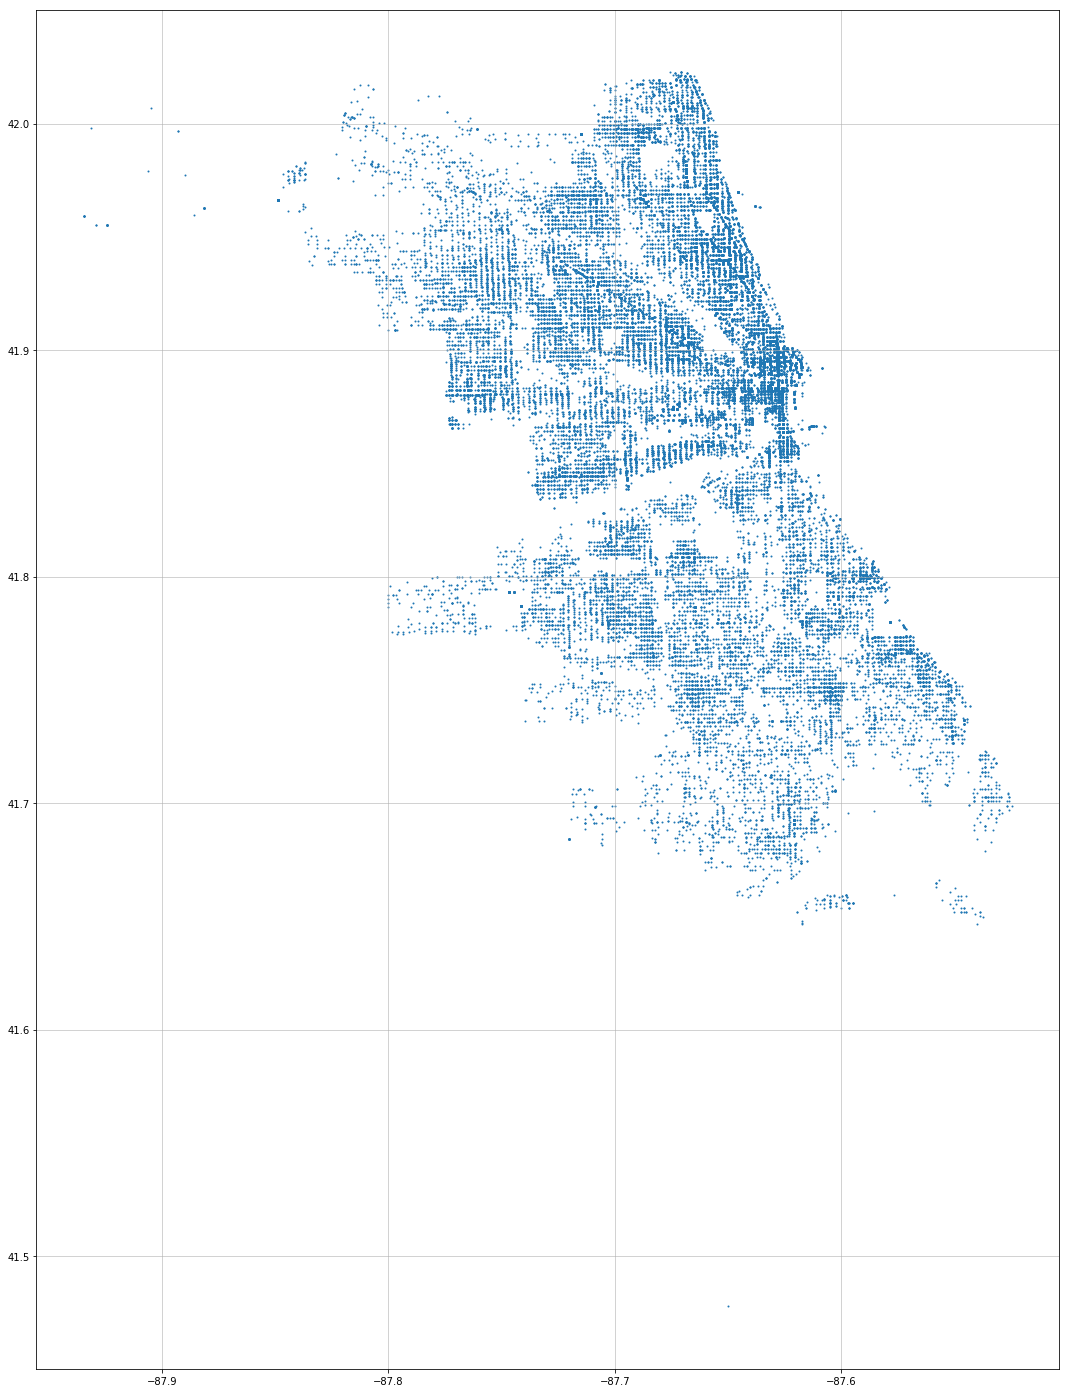

In [113]:
fig, ax = plt.subplots(figsize=(25,25))
full_df.plot(ax=ax, markersize=1)
# chicago_boundary.plot(ax=ax)
ax.grid(True, alpha=0.7)

Alright, that looks way, way better.

In [105]:
out_df = full_df[['address', 'lat', 'lng']]
OUT_PATH = os.path.join('data', 'hacknight_sample_data_geocode_cleaned.csv')
out_df.to_csv(OUT_PATH, index=False)

In [106]:
full_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
1,9188417037,2015-01-01 21:29:00,2167 S ARCHER AV,ac7f6f4be49dfa223571838e586653aa5cdcb6bdfc6385...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MITS,50,100,0.0,50.0,Paid,2015-01-05,NaN,NaN,0,1529,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
2,9188598734,2015-03-26 13:14:00,2140 S ARCHER AV,a493850f62c8ca5a25787271859f0409c289fb84130f33...,OH,PAS,45409,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,PORS,60,120,146.4,0.0,Notice,2015-04-08,SEIZ,NaN,5191566530,780,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
3,9189154639,2015-07-24 14:18:00,2172 S ARCHER AV,38a1ef0c0a325c79e9dba69f6e96652fcbf1e9dcb5db3f...,IL,PAS,606161514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MERZ,50,100,0.0,0.0,Dismissed,2015-09-14,VIOL,Not Liable,5176435360,796,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
4,9188041623,2015-01-17 14:45:00,2107 S ARCHER AV,e3c39cce6c30735cc977656a463233ea6f516328828e8d...,LA,PAS,70072,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HOND,50,100,122.0,0.0,Notice,2015-02-04,SEIZ,NaN,5181845840,1461,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None


In [109]:
full_df['geoid10'].isin(17031010100)

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]